In [60]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load data
# url = "https://drive.google.com/uc?id=1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_&export=download"
# df = pd.read_csv(url)
# df.head()


In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# --- Load
file_id = '1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_'
download_url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(download_url)








In [82]:
# --- 1. Exploration
print(df.head(), "\nShape:", df.shape)
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique => {df[col].unique()}")

print(df.describe(include='all'))

df.rename(columns={'Company':'company','Age':'age','Salary':'salary',
                   'Place':'place','Country':'country','Gender':'gender'}, inplace=True)

   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0 
Shape: (148, 6)
Company: 6 unique => ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Age: 29 unique => [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Salary: 40 unique => [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Place: 11 unique => ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Country: 1 unique => ['

In [84]:

# --- 2. Cleaning
df['age'].replace(0, np.nan, inplace=True)
print("Missing before:", df.isnull().sum())

df.drop_duplicates(inplace=True)

df['age'].fillna(df['age'].median(), inplace=True)
df['salary'].fillna(df['salary'].mean(), inplace=True)
for cat in ['place','country','gender','company']:
    if df[cat].isnull().any():
        df[cat].fillna(df[cat].mode()[0], inplace=True)

# Detect outliers via IQR
for num in ['age','salary']:
    Q1, Q3 = df[num].quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = df[(df[num] < lower) | (df[num] > upper)]
    print(f"Outliers in {num}:\n", outliers)


Missing before: company     8
age        24
salary     24
place      14
country     0
gender      0
dtype: int64
Outliers in age:
 Empty DataFrame
Columns: [company, age, salary, place, country, gender]
Index: []
Outliers in salary:
 Empty DataFrame
Columns: [company, age, salary, place, country, gender]
Index: []


C:\Users\user\AppData\Local\Temp\ipykernel_8440\110135305.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace(0, np.nan, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_8440\110135305.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

Filtered:
      company   age  salary      place country  gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


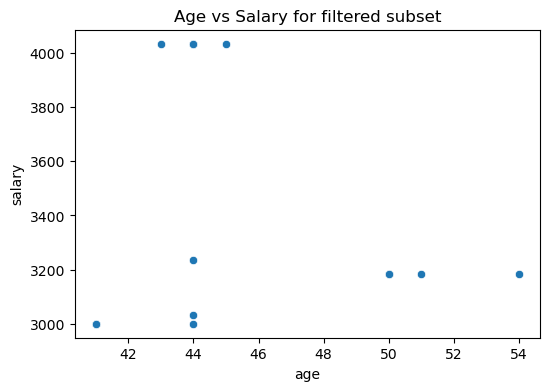

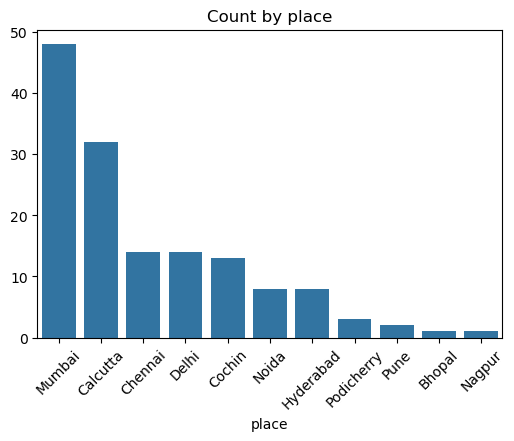

In [86]:
# --- 3. Analysis
filtered = df[(df['age'] > 40) & (df['salary'] < 5000)]
print("Filtered:\n", filtered)

plt.figure(figsize=(6,4))
sns.scatterplot(data=filtered, x='age', y='salary')
plt.title('Age vs Salary for filtered subset')
plt.show()

counts = df['place'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values)
plt.title('Count by place')
plt.xticks(rotation=45)
plt.show()


In [88]:
# --- 4. Encoding
le = LabelEncoder()
for col in ['company','place','country','gender']:
    df[f'{col}_lbl'] = le.fit_transform(df[col])

df_ohe = pd.get_dummies(df, columns=['company','place','country','gender'], drop_first=True)


In [90]:
# --- 5. Feature Scaling
numeric = ['age','salary'] + [c for c in df_ohe.columns if c.endswith('_lbl')]

std = StandardScaler().fit_transform(df_ohe[numeric])
mm = MinMaxScaler().fit_transform(df_ohe[numeric])

df_std = pd.DataFrame(std, columns=[c+'_std' for c in numeric])
df_mm = pd.DataFrame(mm, columns=[c+'_mm' for c in numeric])

df_final = pd.concat([df_ohe, df_std, df_mm], axis=1)
print("Final shape:", df_final.shape)

Final shape: (147, 34)
